# Stage 2 Task One - Memeber

In [1]:
cd ../../src/

C:\Users\andyk\Desktop\Programs\COVID-Team-1\src


In [2]:
import warnings
warnings.filterwarnings('ignore')
import plotly  as plotly 
import plotly.express as px 
import ipynb
from ipynb.fs.full import covid_data as cd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
#plotly.io.orca.config.executable ='C:/Users/andyk/Anaconda3/Lib/site-packages/plotly/io'
pd.set_option('use_inf_as_na', True)

# 1) Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state

### Normalizing County Data

Take "Daily Total Covid Cases/Deaths By County" tables and convert to "Daily New Covid Cases/Deaths By County" and then normalize by population. Resulting tables will show New Cases/Deaths per 10,000,000 people

In [3]:
def normalize(x, population):
    return (x/population)*10000000

#NORMALIZE PRIMARY DATA FOR NEW CASES/DEATHS DAY PER 10,000,000
df = cd.get_covid_primary_data()
population_col = df["population"]
df_first_cols = df.iloc[:,:4]
df_case = df.filter(regex='case')
df_death = df.filter(regex='death')
df_case = df_case.diff(axis=1)
df_death = df_death.diff(axis=1)
df_case = df_case.drop(df_case.columns[0],axis=1)
df_death = df_death.drop(df_death.columns[0],axis=1)
df_data = pd.merge(df_case, df_death, left_index = True, right_index=True)
count = 0
for row in df_data:
    population = population_col.loc[count]
    df_data.loc[count] = df_data.loc[count].apply(normalize, args=(population,))
    count += 1
df_data = df_data.fillna(value=0)
df_data = df_data.round(0).astype(int)
county_data = pd.merge(df_first_cols, df_data, left_index=True, right_index=True)
#county_data.to_csv('andy/data/new_covid_normalized.csv', mode='w', index = True, header=True)

### Get weekly means for each county
Find the the weekly means, then take the mean, median and mode of those value

*Values normalized to case/deaths per 10,000,000 people*

##### CASES

In [4]:
cases_only = county_data.filter(regex="cases")
num_days = len(cases_only.columns)
num_weeks = int(num_days/7)
weekly_cases = pd.DataFrame()
for week in range(0, num_weeks):
    start=week*7
    end = start+6
    column_name = "week " + str(week+1)
    weekly_cases[column_name] = cases_only.iloc[:,start:end].mean(axis=1)
weekly_cases = weekly_cases.round(0).astype(int)

# GENERATE AGGREGATE VALUES AND APPEND
mean = weekly_cases.mean(axis=1).round(0).astype(int)
median = weekly_cases.median(axis=1).round(0).astype(int)
mode = weekly_cases.mode(axis=1)
weekly_cases["mean"] = mean
weekly_cases["median"] = median
weekly_cases["mode"] = mode[0]

first_cols = county_data.iloc[:,:4]
weekly_cases = pd.merge(first_cols, weekly_cases, left_index=True, right_index=True)
single_state_cases = weekly_cases.loc[weekly_cases["State"] == 'NC']
single_state_cases.head()

,countyFIPS,County Name,State,stateFIPS,week 1,week 2,week 3,week 4,week 5,week 6,...,week 28,week 29,week 30,week 31,week 32,week 33,week 34,mean,median,mode
1892,37001,Alamance County,NC,37,0,0,0,0,0,0,...,36,33,31,39,48,28,26,16,8,0.0
1893,37003,Alexander County,NC,37,0,0,0,0,0,0,...,3,6,6,4,5,5,2,2,1,0.0
1894,37005,Alleghany County,NC,37,0,0,0,0,0,0,...,17,1,2,2,2,1,1,1,0,0.0
1895,37007,Anson County,NC,37,0,0,0,0,0,0,...,2,4,8,5,4,5,6,2,2,0.0
1896,37009,Ashe County,NC,37,0,0,0,0,0,0,...,5,4,2,1,3,4,2,1,0,0.0


##### DEATHS

In [5]:
deaths_only = county_data.filter(regex="death")
num_days = len(deaths_only.columns)
num_weeks = int(num_days/7)
weekly_deaths = pd.DataFrame()
for week in range(0, num_weeks):
    start=week*7
    end = start+6
    column_name = "week " + str(week+1)
    weekly_deaths[column_name] = deaths_only.iloc[:,start:end].mean(axis=1)
weekly_deaths = weekly_deaths.round(0).astype(int)

# GENERATE AGGREGATE VALUES AND APPEND
mean = weekly_deaths.mean(axis=1).round(1)
median = weekly_deaths.median(axis=1).round(1)
mode = weekly_deaths.mode(axis=1)
weekly_deaths["mean"] = mean
weekly_deaths["median"] = median
weekly_deaths["mode"] = mode[0]

first_cols = county_data.iloc[:,:4]
weekly_deaths = pd.merge(first_cols, weekly_deaths, left_index=True, right_index=True)
single_state_deaths = weekly_deaths.loc[weekly_deaths["State"] == 'NC']
single_state_deaths.head()

,countyFIPS,County Name,State,stateFIPS,week 1,week 2,week 3,week 4,week 5,week 6,...,week 28,week 29,week 30,week 31,week 32,week 33,week 34,mean,median,mode
1892,37001,Alamance County,NC,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.0,0.0
1893,37003,Alexander County,NC,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1894,37005,Alleghany County,NC,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1895,37007,Anson County,NC,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1896,37009,Ashe County,NC,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0.0


# 2) Compare the data against other states. (normalize by population)
Use the normalized data for US cases/deaths by county "compress" each state into a single row containing a mean median and mode for that state. The "state-wide" mean, median, and mode will be calculated by take the mean of all the indiviual county's mean median and mode.

In [6]:
cases_columns = weekly_cases[["State", "mean", "median", "mode"]]
cases_grouped = cases_columns.groupby("State")
cases_by_state = cases_grouped.mean()
cases_by_state.sort_values(by="mean", ascending=False).head(10)

,mean,median,mode
State,,,
FL,1467.850746,383.417910,0.000000
AL,1363.746269,782.253731,0.000000
AZ,1226.666667,538.533333,0.000000
AR,1022.920000,283.506667,0.000000
DC,886.000000,792.000000,0.000000
DE,851.000000,756.333333,0.000000
GA,701.345912,346.861635,0.006289
CA,622.559322,242.610169,0.000000
CT,497.750000,269.750000,0.000000


In [7]:
deaths_columns = weekly_deaths[["State", "mean", "median", "mode"]]
deaths_grouped = deaths_columns.groupby("State")
deaths_by_state = deaths_grouped.mean()
deaths_by_state.sort_values(by="mean", ascending=False).head(10)

,mean,median,mode
State,,,
CT,36.875000,5.812500,0.000000
AZ,36.373333,17.500000,0.000000
DC,36.300000,14.000000,0.000000
DE,28.933333,11.333333,0.000000
AL,27.346269,1.544776,0.000000
FL,22.122388,6.014925,0.000000
AR,17.550667,0.713333,0.000000
GA,16.953459,2.550314,0.000000
CA,9.135593,3.525424,0.067797


# 3) Identify counties within the previous state with high case and death rates

Use the normalized data for US cases/deaths by county to isolate a state and obtain its aggregate data (mean, median, mode)

##### CASES

In [8]:
#USING THE US-WIDE WEEKLY DATA GENERATED IN PART 1)
single_state_cases = weekly_cases.loc[weekly_cases["State"] == 'NC']
cases = single_state_cases[["County Name","State", "mean", "median","mode"]]
cases_by_mean = cases.sort_values(by=["mean"], ascending=False)
display(cases_by_mean.head())

,County Name,State,mean,median,mode
1951,Mecklenburg County,NC,118,97,0.0
1983,Wake County,NC,71,30,0.0
1932,Guilford County,NC,33,32,0.0
1923,Durham County,NC,31,30,0.0
1925,Forsyth County,NC,29,32,0.0


##### DEATHS

In [9]:
single_state_deaths = weekly_deaths.loc[weekly_deaths["State"] == 'NC']
deaths = single_state_deaths[["County Name","State", "mean", "median","mode"]]
deaths_by_mean = deaths.sort_values(by=["mean"], ascending=False)
display(deaths_by_mean.head())

,County Name,State,mean,median,mode
1951,Mecklenburg County,NC,1.3,1.0,1.0
1983,Wake County,NC,0.9,0.5,0.0
1932,Guilford County,NC,0.7,1.0,0.0
1971,Rowan County,NC,0.3,0.0,0.0
1902,Buncombe County,NC,0.3,0.0,0.0


# 4) Plot daily trends (cases and deaths, new cases) of state and top 5 infected counties. Utilize aggregrate, normalized by population, and log normalized values.

### Daily New Cases/Deaths per 10,000,000 people

First, I will plot the normalized daily new cases and deaths by date. These are the top 5 counties bases on mean of all new cases/deaths.

In [10]:
county_single_state = county_data.loc[county_data["State"] == 'NC']
first_cols = county_single_state.iloc[:,:4]

##### CASES

In [11]:
#SORT VALUES BY MEAN
cases_all = county_single_state.filter(regex='case')
cases_all["mean"] = cases_all.mean(axis=1)
cases_with_mean = pd.merge(first_cols, cases_all, left_index=True, right_index=True)
sorted_cases = cases_with_mean.sort_values(by="mean", ascending=False).head()

#FILTER ONLY CASES/DEATH DATA AND TRANSPOSE TO LONG TABLE
top_five_cases = sorted_cases.filter(regex='case')
top_five_cases = top_five_cases.transpose()

#EXTRACT COLUMN NAMES AND ADD TO NEW LONG TABLE
case_names = sorted_cases["County Name"]
top_five_cases.columns = case_names

#PLOT DATA
labels_cases = {'index':'Date', 'value':'New Cases per 10,000,000 People'}
#labels_deaths = {'index':'Date', 'value':'New Deaths per 10,000,000 People'}
daily_cases = px.line(top_five_cases, x=top_five_cases.index, y=top_five_cases.columns, labels=labels_cases)
#daily_deaths = px.line(top_five_deaths, x=top_five_deaths.index, y=top_five_deaths.columns, labels=labels_deaths)

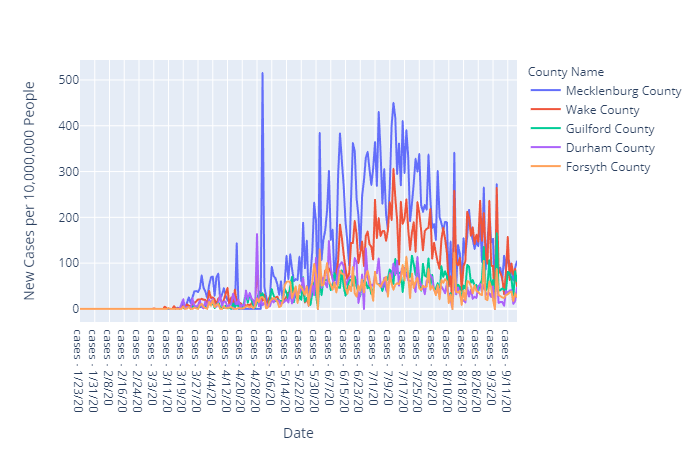

In [18]:
#daily_cases.show()
Image(filename="andy/images/daily_case_single_state.png")


In [ ]:
#SORT VALUES BY MEAN
deaths_all = county_single_state.filter(regex='death')
deaths_all["mean"] = deaths_all.mean(axis=1)
deaths_with_mean = pd.merge(first_cols, deaths_all, left_index=True, right_index=True)
sorted_deaths = deaths_with_mean.sort_values(by="mean", ascending=False).head()

#FILTER ONLY CASES/DEATH DATA AND TRANSPOSE TO LONG TABLE
top_five_deaths = sorted_deaths.filter(regex='death')
top_five_deaths = top_five_deaths.transpose()

#EXTRACT COLUMN NAMES AND ADD TO NEW LONG TABLE
deaths_names = sorted_deaths["County Name"]
top_five_deaths.columns = deaths_names

#PLOT DATA
labels_deaths = {'index':'Date', 'value':'New Deaths per 10,000,000 People'}
daily_deaths = px.line(top_five_deaths, x=top_five_deaths.index, y=top_five_deaths.columns, labels=labels_deaths)

In [ ]:
daily_deaths.show()

### Aggregate values of top 5 counties

In [ ]:
# USING THE SORTED AGGREGATE DATA FROM PART 3
top_case_mean = cases_by_mean.head()
top_death_mean = deaths_by_mean.head()

labels_cases = {'mean': 'Mean of Daily New Cases'}
labels_deaths = {'mean': 'Mean of Daily New Deaths'}
cases_mean_plot = px.bar(top_case_mean, x=top_case_mean["County Name"], y=top_case_mean["mean"], labels=labels_cases)
deaths_mean_plot = px.bar(top_death_mean, x=top_death_mean["County Name"], y=top_death_mean["mean"], labels=labels_cases)

In [ ]:
cases_mean_plot.show()

In [ ]:
deaths_mean_plot.show()